### Cryptho currency liquitiy pridiction
* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

###  Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')  

In [2]:
# Importing the dataset
df = pd.read_csv('cripto_data.csv')

In [3]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,5.000000e+02,497.000000,497.000000,497.000000,4.970000e+02,5.000000e+02
mean,6.527851e+02,0.018746,0.028849,0.039016,3.276644e+08,3.722677e+09
std,4.578529e+03,0.013867,0.058065,0.203688,3.182264e+09,3.784349e+10
min,1.544000e-09,-0.039000,-0.141000,-0.547000,0.000000e+00,6.577043e+07
25%,1.904625e-01,0.011000,0.004000,-0.020000,1.838591e+06,1.146391e+08
50%,1.085000e+00,0.018000,0.021000,0.006000,8.581305e+06,2.083208e+08
75%,6.925000e+00,0.026000,0.040000,0.049000,4.075655e+07,5.845642e+08
max,4.121727e+04,0.086000,0.573000,2.935000,5.793497e+10,7.709915e+11


In [6]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64

### Exploring Data

In [7]:
# Interpolate missing values for numerical columns
df['1h'] = df['1h'].interpolate(method='linear')
df['24h'] = df['24h'].interpolate(method='linear')
df['7d'] = df['7d'].interpolate(method='linear')
df['24h_volume'] = df['24h_volume'].interpolate(method='linear')
# Verify the missing values are gone
print(df.isnull().sum())

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64


In [8]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [9]:
# code to convert the 'date' column
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [10]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [11]:


# 2. Top Cryptocurrencies by Market Capitalization
top_mkt_cap = df.sort_values(by='mkt_cap', ascending=False)



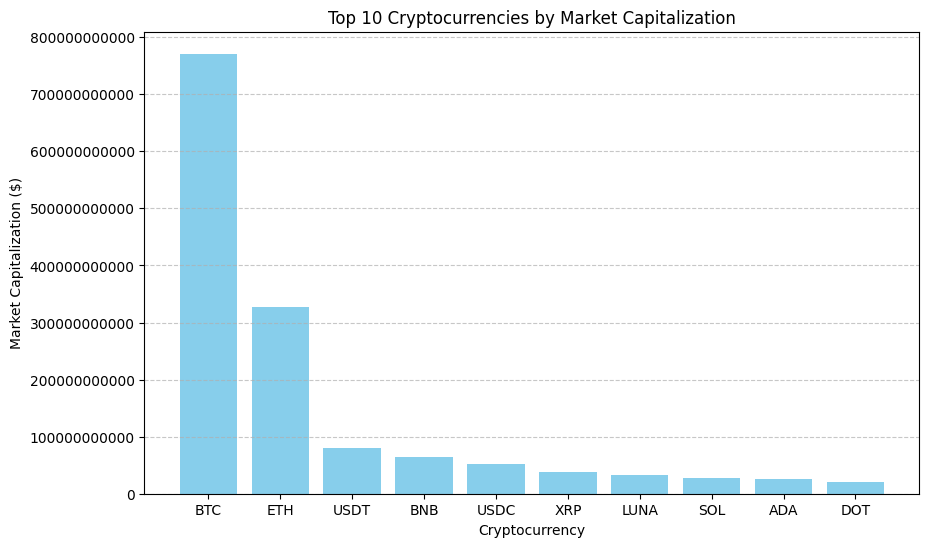

In [12]:
top_mkt_cap = df.sort_values(by='mkt_cap', ascending=False).head(10)

# 3. Visualization
plt.figure(figsize=(10, 6))
plt.bar(top_mkt_cap['symbol'], top_mkt_cap['mkt_cap'], color='skyblue')
plt.title('Top 10 Cryptocurrencies by Market Capitalization')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Capitalization ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Key Observations
Dominance of the Top Two: The chart shows that the value is highly concentrated at the top. The market capitalization of BTC and ETH together makes up a substantial portion of the total market value of the top 10 coins.

Market Skewness: This visualization provides a clear picture of the market's skewness, a concept we identified in our univariate analysis. A few assets hold the majority of the market's value, creating a "long tail" of smaller-cap cryptocurrencies.

Ranking Consistency: The ranking of the top cryptocurrencies by market cap is clearly shown, with BTC at #1, ETH at #2, and the stablecoins USDT and USDC occupying key positions.

#### Conclusion
The bar chart is an effective and professional visualization of the cryptocurrency market's structure. It underscores the high concentration of market value and the clear dominance of Bitcoin and Ethereum. The visual disparity in bar heights reinforces our previous findings from the univariate analysis, confirming the extreme skewness of the market capitalization data. This understanding is foundational for any further analysis or modeling.

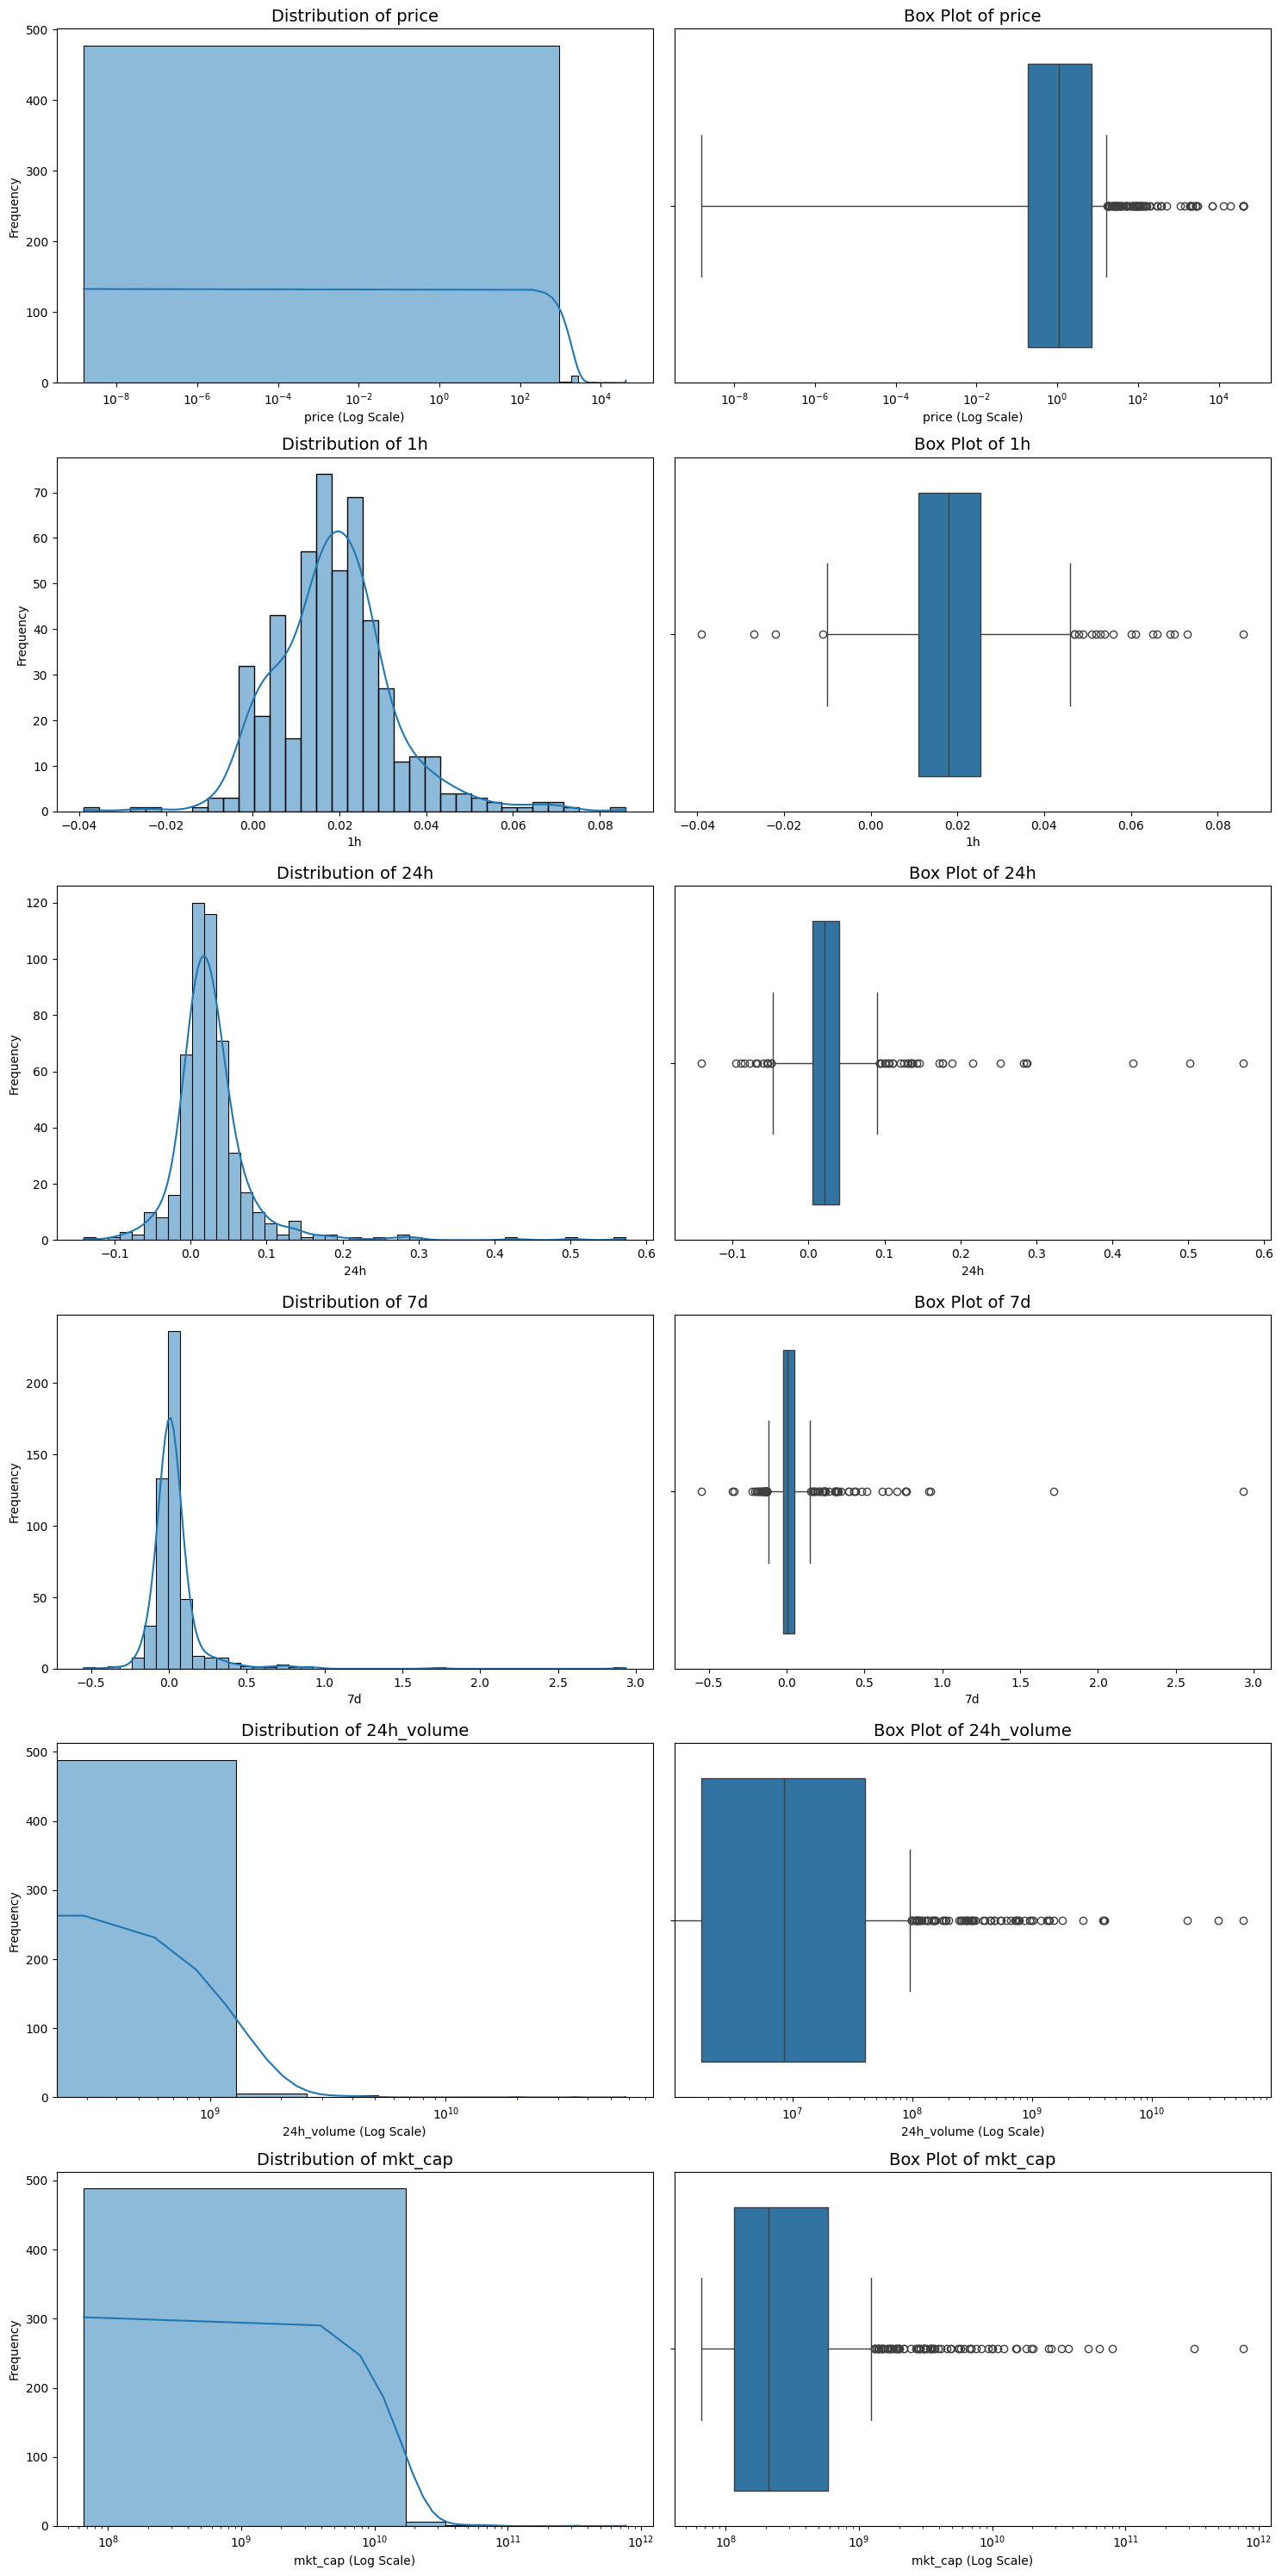

In [13]:
numerical_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 5 * len(numerical_cols)))

# Loop through each numerical column to create a histogram and a box plot
for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i, 1].set_xlabel(col)
    
    # Check if a log scale is needed for large values
    if col in ['price', '24h_volume', 'mkt_cap']:
        axes[i, 0].set_xscale('log')
        axes[i, 1].set_xscale('log')
        axes[i, 0].set_xlabel(f'{col} (Log Scale)')
        axes[i, 1].set_xlabel(f'{col} (Log Scale)')

plt.tight_layout()
plt.show()

## Univariate Analysis Report: Cryptocurrency Market Data

### **Executive Summary**

The univariate analysis of the cryptocurrency dataset reveals key characteristics of the market's structure and behavior. The metrics for value (**price**, **market capitalization**, and **24-hour volume**) are all highly skewed, indicating that a small number of cryptocurrencies hold the majority of the market's value. Conversely, volatility metrics (**1h**, **24h**, and **7d** price changes) are centered around zero but contain numerous outliers, confirming the high volatility inherent to the cryptocurrency market.


### **1. Analysis of Value-Based Metrics**

The analysis of `price`, `24h_volume`, and `mkt_cap` shows a consistent pattern of high skewness.

* **Distributions**: The histograms for these metrics are **heavily right-skewed**. The vast majority of data points are concentrated at the lower end of the scale. The distributions have a "long tail" extending to the right, which is a direct result of a few top cryptocurrencies having disproportionately high values.
* **Outliers**: The box plots for these columns visually confirm the presence of significant **outliers**. These outliers represent the dominant players in the market, such as **Bitcoin** and **Ethereum**, and are not errors but rather key data points that define the market's structure.
* **Logarithmic Scale**: The use of a logarithmic scale was essential to visualize these metrics effectively. Without it, the vast range in values would have compressed the data, making the distributions unreadable.



### **2. Analysis of Volatility Metrics**

The metrics related to percentage price changes—`1h`, `24h`, and `7d`—show a different but equally important pattern.

* **Distributions**: The histograms for these metrics are **centered around zero**, indicating that most price changes within these timeframes are relatively small. This represents periods of low volatility or stability.
* **Outliers**: The box plots reveal a large number of **outliers** in both the positive and negative directions. These outliers are crucial as they represent periods of significant price movements (both gains and losses) and highlight the unpredictable and volatile nature of the cryptocurrency market.



### **Conclusion**

The univariate analysis provides a clear picture of the cryptocurrency market. It is characterized by a high degree of **centralization** of value in a small number of assets and is subject to frequent and significant **volatility**. These findings are a critical first step in understanding the dataset and will inform subsequent analyses, such as exploring the relationships between these variables in a bivariate analysis.

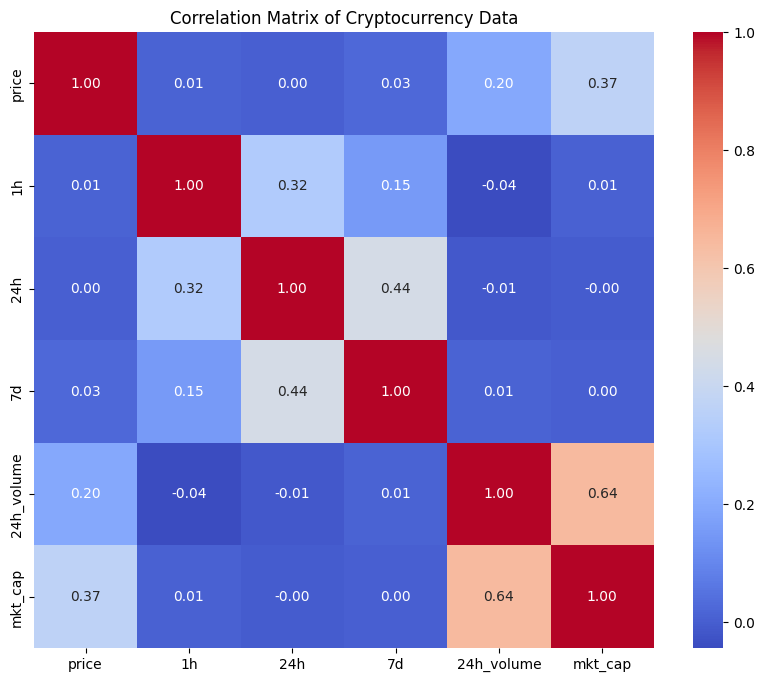

In [14]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Cryptocurrency Data')
plt.show()

#### Analysis of the Correlation Matrix Heatmap


* Strongest Correlation: The most significant finding is the strong positive correlation of 0.64 between mkt_cap and 24h_volume. This is a crucial insight, indicating that cryptocurrencies with a higher market capitalization tend to have a higher 24-hour trading volume. This makes intuitive sense, as larger, more established assets are generally traded more frequently.

* Other Correlations: There's a moderate positive correlation of 0.37 between price and mkt_cap. This suggests that while a higher price can contribute to a larger market cap, the relationship isn't perfectly linear. The price-change metrics (1h, 24h, and 7d) show very little linear correlation with the value metrics, which is expected since price changes are often volatile and less predictable based on market size alone.

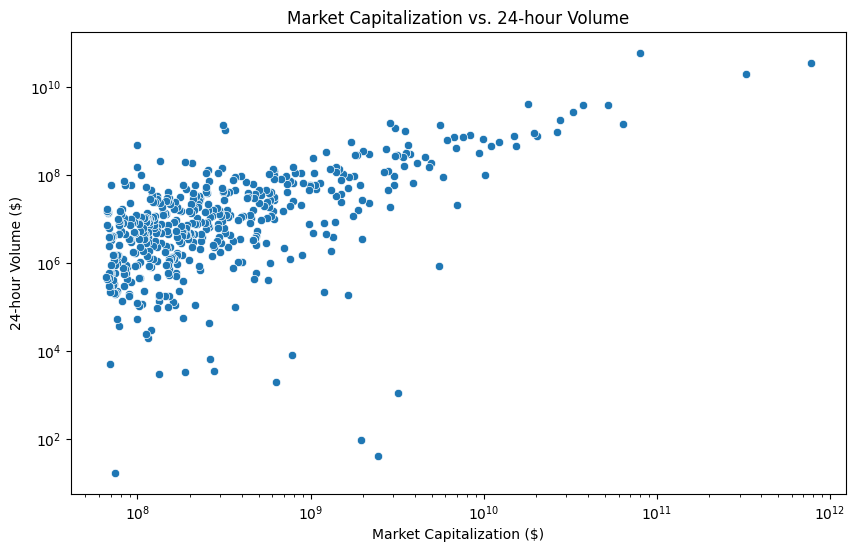

In [15]:
# Create a scatter plot of Market Cap vs. 24h Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mkt_cap'], y=df['24h_volume'])
plt.title('Market Capitalization vs. 24-hour Volume')
plt.xlabel('Market Capitalization ($)')
plt.ylabel('24-hour Volume ($)')
plt.xscale('log') # Use a log scale to better view the skewed data
plt.yscale('log') # Use a log scale
plt.show()

#### Analysis of the Scatter Plot
* Positive Trend: The data points generally follow an upward trend from the bottom left to the top right. This visually reinforces that as a cryptocurrency's market cap increases, its trading volume also tends to increase.

* Logarithmic Scale: The use of a logarithmic scale on both axes was critical. Without it, the vast range of values for market cap and volume would have compressed all data points into a single cluster, making the plot unreadable. The current plot effectively shows the distribution across multiple orders of magnitude.